In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")


In [ ]:
data_path = '/content/drive/MyDrive/PS_20174392719_1491204439457_log.csv'
df = pd.read_csv(data_path)

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.type.value_counts()

,count
type,
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


In [ ]:
type = df["type"].value_counts()
transactions = type.index
quantity = type.values

import plotly.express as px
figure = px.pie(df,
             values=quantity,
             names=transactions,hole = 0.5,
             title="Distribution of Transaction Type")
figure.show()

In [ ]:
numerical_df = df.select_dtypes(include=np.number)
correlation = numerical_df.corr()
print(correlation["isFraud"].sort_values(ascending=False))

isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


In [ ]:
df["type"] = df["type"].map({"CASH_OUT": 1, "PAYMENT": 2,
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})
df["isFraud"] = df["isFraud"].map({0: "No Fraud", 1: "Fraud"})
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,No Fraud,0
1,1,2,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,No Fraud,0
2,1,4,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,Fraud,0
3,1,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,Fraud,0
4,1,2,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,No Fraud,0


In [ ]:
from sklearn.model_selection import train_test_split
x = np.array(df[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(df[["isFraud"]])

In [ ]:
features = np.array([[4, 9000.60, 9000.60, 0.0]])
print(model.predict(features))

['Fraud']


In [ ]:
from sklearn.tree import DecisionTreeClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=42)
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.9996958799991199

In [ ]:
from sklearn.linear_model import LogisticRegression
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=42)
model = LogisticRegression()
model.fit(xtrain, ytrain)
score = model.score(xtest, ytest)
print("Accuracy:", score)


Accuracy: 0.9991120010310218


In [ ]:
from xgboost import XGBClassifier
x = np.array(df[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(df["isFraud"].map({"No Fraud": 0, "Fraud": 1}))
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=42)
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(xtrain, ytrain)
score = model.score(xtest, ytest)
print("Accuracy:", score)

Accuracy: 0.9995552146757154


In [ ]:
anomaly_scores = model.predict_proba(xtest)[:, 1]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(xtrain, ytrain)
score = model.score(xtest, ytest)
print("Accuracy:", score)


Accuracy: 0.9997430303868532


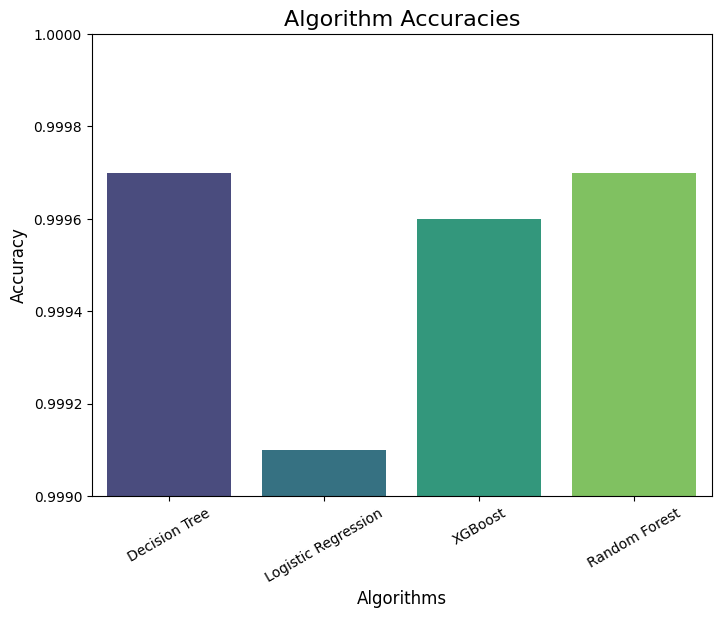

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
algorithms = ["Decision Tree", "Logistic Regression", "XGBoost", "Random Forest"]
accuracies = [0.9997, 0.9991, 0.9996, 0.9997]
plt.figure(figsize=(8, 6))
sns.barplot(x=algorithms, y=accuracies, palette="viridis")
plt.title("Algorithm Accuracies", fontsize=16)
plt.ylabel("Accuracy", fontsize=12)
plt.xlabel("Algorithms", fontsize=12)
plt.ylim(0.9990, 1.0000)
plt.xticks(rotation=30)
plt.show()


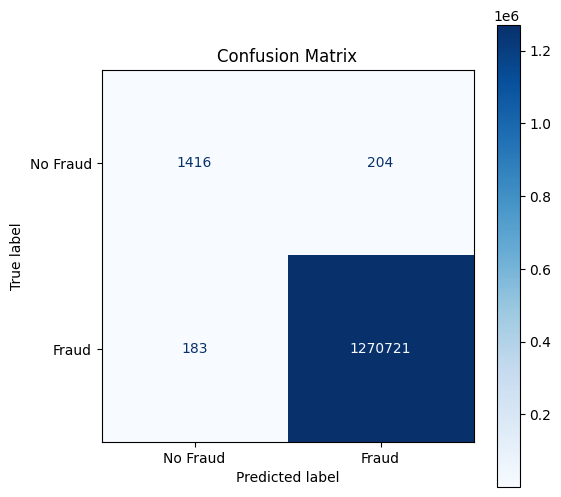

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ypred = model.predict(xtest)
cm = confusion_matrix(ytest, ypred)
plt.figure(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Fraud", "Fraud"])
disp.plot(cmap="Blues", values_format='d', ax=plt.gca())
plt.title("Confusion Matrix")
plt.show()


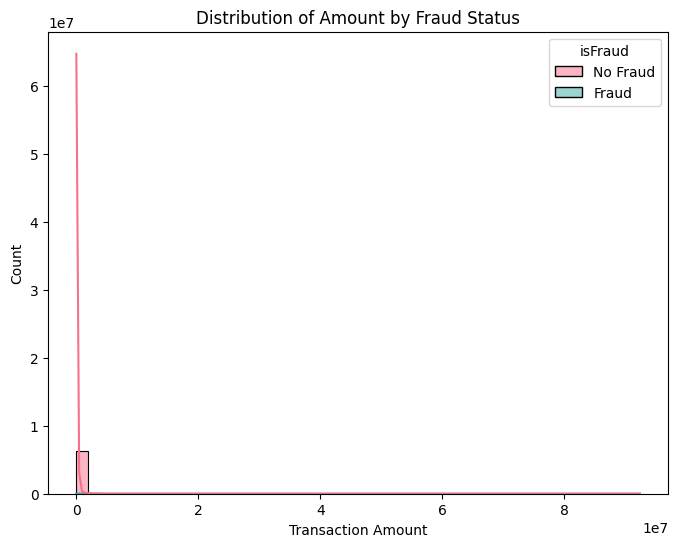

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="amount", hue="isFraud", kde=True, bins=50, palette="husl")
plt.title("Distribution of Amount by Fraud Status")
plt.xlabel("Transaction Amount")
plt.ylabel("Count")
plt.show()


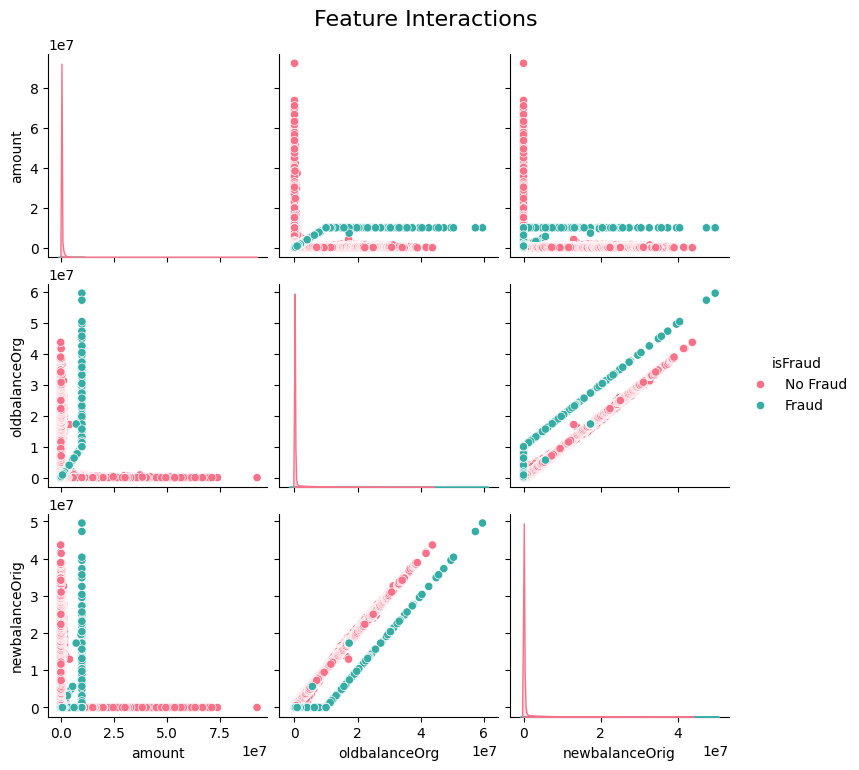

In [ ]:
sns.pairplot(df[["amount", "oldbalanceOrg", "newbalanceOrig", "isFraud"]], hue="isFraud", palette="husl")
plt.suptitle("Feature Interactions", y=1.02, fontsize=16)
plt.show()
